In [2]:
%load_ext autoreload
%autoreload 2
# Enable imports form top-level of project (edit top_level_path accordingly)
import os
import sys
import inspect

top_level_path = os.path.abspath(os.path.join('..'))
if top_level_path not in sys.path:
	sys.path.append(top_level_path)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from benchmarking import RandomParams, Benchmark, new_random_benchmark, Solver, new_graph_file_benchmark
import re

In [15]:
def generate():
  return [
    RandomParams(directed=True, num_vertices=50, average_degree=a) 
      for a in np.arange(1, 2.0, 0.1) for _ in range(100)
  ]

params_code = inspect.getsource(generate)
params_list = generate()

benchmark = new_random_benchmark(params_list, solvers=[
	Solver("brute", "FAST_BOUND"),
	Solver("brute", "BRUTE_FORCE"),
], params_code = params_code, override_benchmark_path="../benchmarks/test")

benchmark.benchmark_path

'../benchmarks/test(5)'

In [4]:
benchmark = Benchmark.load("../benchmarks/test(5)")

In [16]:
benchmark.run(retryFailures=False, timeout=10)


graph: 0.txt, solver: brute('FAST_BOUND') ... 

✅
length: 7, run_time: 1.1e-05
graph: 1.txt, solver: brute('FAST_BOUND') ... ✅
length: 5, run_time: 8e-06
graph: 2.txt, solver: brute('FAST_BOUND') ... ✅
length: 11, run_time: 1.8e-05
graph: 3.txt, solver: brute('FAST_BOUND') ... ✅
length: 15, run_time: 1.4e-05
graph: 4.txt, solver: brute('FAST_BOUND') ... ✅
length: 7, run_time: 8e-06
graph: 5.txt, solver: brute('FAST_BOUND') ... ✅
length: 17, run_time: 1.9e-05
graph: 6.txt, solver: brute('FAST_BOUND') ... ✅
length: 13, run_time: 1.4e-05
graph: 7.txt, solver: brute('FAST_BOUND') ... ✅
length: 9, run_time: 9e-06
graph: 8.txt, solver: brute('FAST_BOUND') ... ✅
length: 17, run_time: 1.2e-05
graph: 9.txt, solver: brute('FAST_BOUND') ... ✅
length: 9, run_time: 9e-06
graph: 10.txt, solver: brute('FAST_BOUND') ... ✅
length: 14, run_time: 1e-05
graph: 11.txt, solver: brute('FAST_BOUND') ... ✅
length: 8, run_time: 8e-06
graph: 12.txt, solver: brute('FAST_BOUND') ... ✅
length: 8, run_time: 8e-06
graph: 13.txt, solver: brute('FAST_BOUND') ... ✅
l

In [5]:
# name = os.path.splitext(os.path.basename(benchmark.benchmark_path))[0]

results = benchmark.results()
solver_names = [str(solver) for solver in benchmark.solvers]
graph_infos = benchmark.info["graph_infos"]
# pd.DataFrame(results)
solver_names

df = pd.DataFrame(results)
df["solver_name"] = df["solver"].apply(lambda i: solver_names[i])
# df["average_degree"] = df["graph_id"].apply(lambda id: graph_infos[id]['average_degree'])



<Axes: xlabel='average_degree', ylabel='specified_average_degree'>

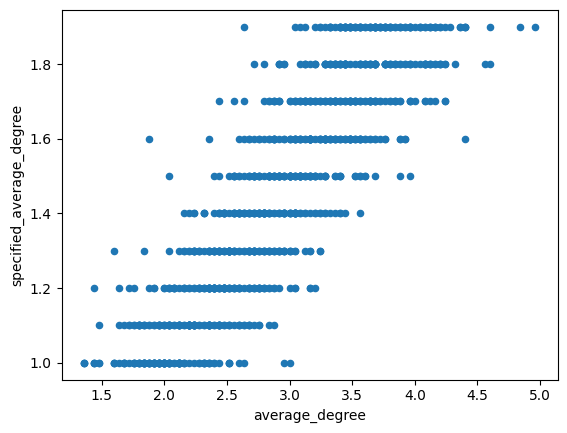

In [6]:
graph_data = pd.DataFrame([{"id" : id, "vertices": graph.vertices, "edges": len(graph.edges)} for id, graph in benchmark.graphs])
graph_data["average_degree"] = 2 * graph_data["edges"] / graph_data["vertices"]
graph_data["specified_average_degree"] = graph_data["id"].apply(lambda id: graph_infos[id]['average_degree'])

graph_data[["average_degree", "specified_average_degree"]].plot.scatter(x="average_degree", y="specified_average_degree")

<Axes: title={'center': 'average_degree'}, xlabel='[specified_average_degree]'>

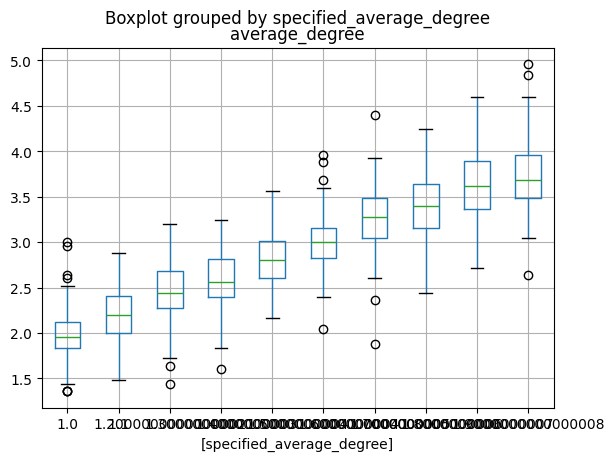

In [7]:
graph_data[["average_degree", "specified_average_degree"]].boxplot(by="specified_average_degree")


<Axes: ylabel='Frequency'>

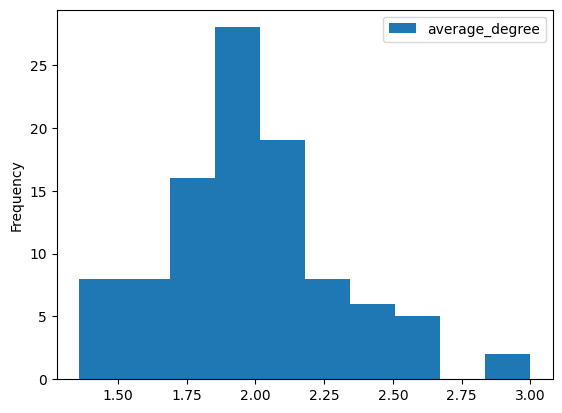

In [8]:
graph_data[graph_data["specified_average_degree"] == 1.0][["average_degree"]].plot.hist(bins=10)

In [9]:
df = pd.merge(df, graph_data, left_on="graph_id", right_on="id")

run_time    Axes(0.125,0.11;0.775x0.77)
dtype: object

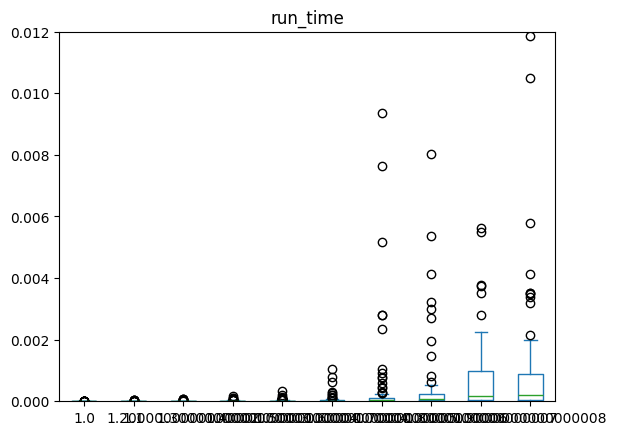

In [38]:
df[df["solver"] == 0][["run_time", "specified_average_degree"]].plot.box(by="specified_average_degree", ylim=(0,0.012))


In [28]:
view = df[['specified_average_degree', 'solver_name','length', 'run_time']]

to_plot = df.groupby(['specified_average_degree', 'solver', 'solver_name']).agg({'run_time': 'mean'}).reset_index() \
    .pivot(index='specified_average_degree', columns='solver_name', values='run_time') \
    .rename(columns=lambda x: x + " (average)");


df

,path,run_time,length,solver,graph_id,solver_name,id,vertices,edges,average_degree,specified_average_degree
0,"[10, 38, 47, 40, 26, 37, 31, 7]",0.000011,7,0,0,brute('FAST_BOUND'),0,50,47,1.88,1.0
1,"[33, 41, 49, 32, 28, 29]",0.000008,5,0,1,brute('FAST_BOUND'),1,50,40,1.60,1.0
2,"[38, 48, 33, 34, 2, 12, 18, 15, 20, 22, 35, 32]",0.000018,11,0,2,brute('FAST_BOUND'),2,50,46,1.84,1.0
3,"[12, 44, 5, 48, 0, 20, 36, 31, 22, 38, 49, 13,...",0.000014,15,0,3,brute('FAST_BOUND'),3,50,51,2.04,1.0
4,"[1, 37, 44, 3, 23, 43, 7, 46]",0.000008,7,0,4,brute('FAST_BOUND'),4,50,44,1.76,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,"[37, 48, 8, 19, 2, 22, 45, 28, 3, 35, 47, 27, ...",0.000812,27,1,995,brute('BRUTE_FORCE'),995,50,110,4.40,1.9
1996,"[12, 38, 11, 39, 17, 42, 37, 4, 10, 5, 28, 40,...",0.000627,28,1,996,brute('BRUTE_FORCE'),996,50,96,3.84,1.9
1997,"[35, 25, 47, 15, 41, 48, 3, 20, 14, 17, 16, 34...",0.000017,17,1,997,brute('BRUTE_FORCE'),997,50,85,3.40,1.9
1998,"[6, 35, 47, 49, 10, 45, 29, 28, 4, 11, 25, 5, ...",0.011542,34,1,998,brute('BRUTE_FORCE'),998,50,104,4.16,1.9


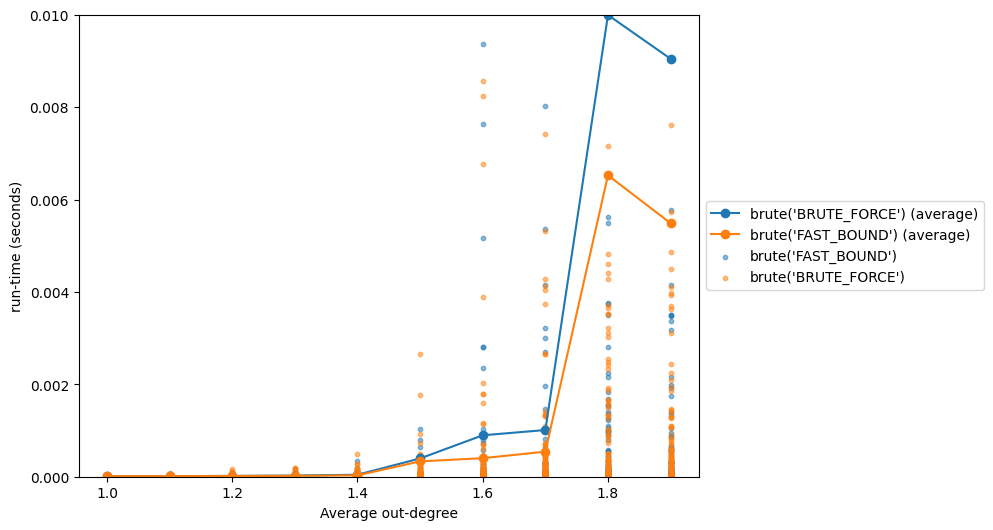

In [29]:
to_plot.plot(style="o-")

for solver_name in solver_names:
    solver_df = df[df["solver_name"] == solver_name]  # Select rows where run-time is not null
    plt.scatter(solver_df['specified_average_degree'], solver_df['run_time'], label=solver_name, alpha=0.5, s=10)

# plt.yscale('log')
# plt.xticks(np.arange(1, 4.0, 0.5))
plt.ylabel("run-time (seconds)")
plt.xlabel("Average out-degree")
# plt.title("Longest path solve-time for random directed graphs with 50 vertices")
# plt.axhline(y=0.015, color='black', linestyle='--', label='run-time cutoff', linewidth=1, alpha=0.5, zorder=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# df[df["solver"] == 0].plot(x = "average_degree", y="run_time", style="--bo", label="solver_name")
# df[df["solver"] == 1].plot(x = "average_degree", y="run_time", style="--bo", label="solver_name")
plt.ylim(0, 0.010)

plt.gcf().set_size_inches(8, 6)
plt.savefig(os.path.join(benchmark.benchmark_path, "plot.png"), dpi=400, bbox_inches='tight')

In [30]:
df[df["average_degree"] > 4]

,path,run_time,length,solver,graph_id,solver_name,id,vertices,edges,average_degree,specified_average_degree
618,"[18, 47, 1, 13, 29, 24, 44, 46, 43, 42, 30, 21...",0.009357,37,0,618,brute('FAST_BOUND'),618,50,110,4.40,1.6
721,"[4, 48, 44, 36, 26, 49, 13, 35, 18, 12, 27, 29...",0.000459,27,0,721,brute('FAST_BOUND'),721,50,106,4.24,1.7
742,"[11, 33, 16, 1, 34, 25, 36, 21, 9, 30, 44, 48,...",0.008035,33,0,742,brute('FAST_BOUND'),742,50,102,4.08,1.7
751,"[24, 38, 4, 31, 7, 43, 12, 3, 8, 44, 29, 26, 1...",0.003215,34,0,751,brute('FAST_BOUND'),751,50,102,4.08,1.7
752,"[35, 41, 43, 23, 6, 49, 48, 22, 47, 34, 45, 11...",0.000159,24,0,752,brute('FAST_BOUND'),752,50,103,4.12,1.7
...,...,...,...,...,...,...,...,...,...,...,...
1987,"[7, 49, 15, 38, 28, 27, 10, 11, 42, 34, 41, 25...",0.088597,37,1,987,brute('BRUTE_FORCE'),987,50,124,4.96,1.9
1993,"[49, 16, 21, 29, 24, 30, 39, 19, 42, 28, 2, 22...",0.000402,23,1,993,brute('BRUTE_FORCE'),993,50,105,4.20,1.9
1994,"[7, 6, 49, 46, 45, 38, 22, 35, 47, 13, 27, 36,...",0.004504,34,1,994,brute('BRUTE_FORCE'),994,50,101,4.04,1.9
1995,"[37, 48, 8, 19, 2, 22, 45, 28, 3, 35, 47, 27, ...",0.000812,27,1,995,brute('BRUTE_FORCE'),995,50,110,4.40,1.9


In [31]:
to_plot2 = df[df["average_degree"] < 4].groupby("solver").get_group(0)[["run_time", "average_degree"]].sort_values(by="average_degree")
to_plot2


,run_time,average_degree
39,0.000009,1.36
58,0.000007,1.36
36,0.000009,1.36
26,0.000009,1.44
249,0.000007,1.44
...,...,...
536,0.001033,3.96
967,0.000870,3.96
724,0.000492,3.96
939,0.001046,3.96


<Axes: xlabel='average_degree'>

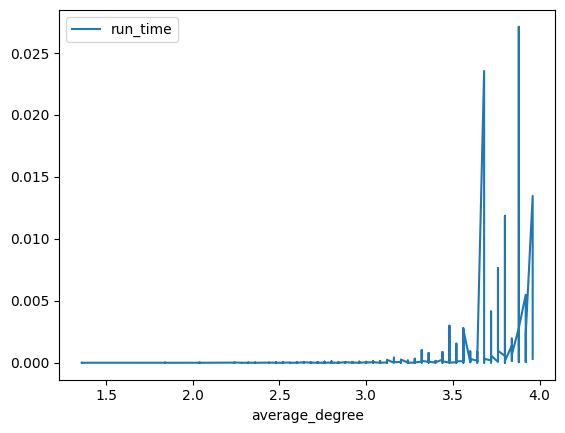

In [32]:
to_plot2.plot(x="average_degree", y="run_time")

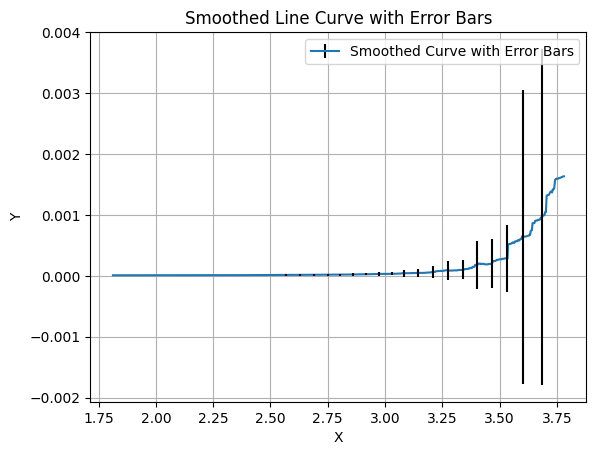

In [21]:
rolling_window = 100
df_smoothed = to_plot2.rolling(rolling_window, center=True).mean()
df_std = to_plot2.rolling(rolling_window, center=True).std()

# Plot the smoothed curve with error bars
plt.errorbar(df_smoothed['average_degree'], df_smoothed['run_time'], yerr=df_std['run_time'], label='Smoothed Curve with Error Bars', errorevery=30, barsabove=True, ecolor="black")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Smoothed Line Curve with Error Bars')
plt.legend()
plt.grid(True)
plt.show()

In [121]:
benchmark = Benchmark.load("../benchmarks/rob-top2000")
name = os.path.splitext(os.path.basename(benchmark.benchmark_path))[0]

results = benchmark.results()
solver_names = [str(solver) for solver in benchmark.solvers]
graph_infos = benchmark.info["graph_infos"]

df = pd.DataFrame(results)
df["solver_name"] = df["solver"].apply(lambda i: solver_names[i])

ax = df.plot.bar(x="solver_name", y="run_time") \

for i, value in enumerate(df["run_time"]):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom')  # Display value at the top of the bar


ax.tick_params(axis='x', labelrotation=0)
plt.ylabel("run-time (seconds)")
plt.title("Longest path solve-time for Top 2000 songs graph")

plt.gcf().set_size_inches(12, 6)
plt.savefig(os.path.join(benchmark.benchmark_path, "plot.png"), dpi=400, bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '../benchmarks/rob-top2000/info.json'